# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="https://drive.google.com/uc?id=1j4eZRrDDC_ayowY7oj2ymsRMphdE4Tuf" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="https://drive.google.com/uc?id=1xQC3f1RCcZxyVUbZ71T-e4HyRIJFF94C" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [150]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
### YOUR CODE HERE ###
#import statsmodels.api as sm
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
# Load dataset into dataframe
file_path = '/content/drive/My Drive/Advanced Data Analytics Certificate/Activity Datasets/tiktok_dataset.csv'
data = pd.read_csv(file_path)

<img src="https://drive.google.com/uc?id=1kpRJdR0z6z3foENI0hyMdZ9duLvXZ8Ca" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


1. Outliers and extreme data values can significantly impact linear regression equations. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.
2. EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with data set means, medians, and other similar methods.
3. It's important to check for things like multicollinearity between predictor variables, as well to understand their distributions, as this will help you decide what statistical inferences can be made from the model and which ones cannot.
4. Additionally, it can be useful to engineer new features. For example, in this dataset you can create a new variable by extracting the length of String values from the `video_transcription_text` variable.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [153]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [154]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [155]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

,0
#,int64
claim_status,object
video_id,int64
video_duration_sec,int64
video_transcription_text,object
verified_status,object
author_ban_status,object
video_view_count,float64
video_like_count,float64
video_share_count,float64


Get basic information about the dataset.

In [156]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [157]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [158]:
# prompt: randomly select 25% of rows in data and call it data_test. The remaining unselected rows will called data_train.

data_train, data_test = train_test_split(data, test_size=0.25, random_state=0)


In [159]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14536 entries, 6629 to 2732
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         14536 non-null  int64  
 1   claim_status              14319 non-null  object 
 2   video_id                  14536 non-null  int64  
 3   video_duration_sec        14536 non-null  int64  
 4   video_transcription_text  14319 non-null  object 
 5   verified_status           14536 non-null  object 
 6   author_ban_status         14536 non-null  object 
 7   video_view_count          14319 non-null  float64
 8   video_like_count          14319 non-null  float64
 9   video_share_count         14319 non-null  float64
 10  video_download_count      14319 non-null  float64
 11  video_comment_count       14319 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.4+ MB


In [160]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4846 entries, 17817 to 2502
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         4846 non-null   int64  
 1   claim_status              4765 non-null   object 
 2   video_id                  4846 non-null   int64  
 3   video_duration_sec        4846 non-null   int64  
 4   video_transcription_text  4765 non-null   object 
 5   verified_status           4846 non-null   object 
 6   author_ban_status         4846 non-null   object 
 7   video_view_count          4765 non-null   float64
 8   video_like_count          4765 non-null   float64
 9   video_share_count         4765 non-null   float64
 10  video_download_count      4765 non-null   float64
 11  video_comment_count       4765 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 492.2+ KB


In [161]:
# prompt: Verify that the number of rows in data equals to the sum of numbers of rows in data_train and data_test

# Verify that the number of rows in data equals to the sum of numbers of rows in data_train and data_test
len(data) == len(data_train) + len(data_test)


True

In [162]:
# prompt: Compute the percentage of the number of rows in data_test in the number of rows in data

print(len(data_test)/len(data) * 100)


25.002579713135898


In [163]:
# Check for missing values
### YOUR CODE HERE ###
data_train.isna().sum()

,0
#,0
claim_status,217
video_id,0
video_duration_sec,0
video_transcription_text,217
verified_status,0
author_ban_status,0
video_view_count,217
video_like_count,217
video_share_count,217


In [164]:
# EXTRA
data_train['claim_status'].value_counts(normalize=True)

,proportion
claim_status,
claim,0.504435
opinion,0.495565


In [165]:
# Drop rows with missing values
### YOUR CODE HERE ###
data_train = data_train.dropna(axis=0)

In [166]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
data_train.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
6629,6630,claim,5827297713,20,a colleague learned from the media a claim th...,not verified,active,726128.0,99642.0,19477.0,1844.0,70.0
12303,12304,opinion,3604389227,53,my hypothesis is that baby octopuses are the s...,not verified,active,1130.0,389.0,145.0,5.0,2.0
1927,1928,claim,3400704837,9,a friend learned in a discussion board that d...,not verified,active,407317.0,33937.0,12291.0,64.0,23.0
13070,13071,opinion,9867115563,17,our position is that windshield wipers were in...,not verified,active,5395.0,174.0,11.0,3.0,0.0
5931,5932,claim,3098472800,19,a colleague learned online that human eyeball...,not verified,active,29745.0,13557.0,4443.0,325.0,70.0


In [167]:
# prompt: reset index of data_train

data_train = data_train.reset_index(drop=True)


In [168]:
# prompt: show head

data_train.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,6630,claim,5827297713,20,a colleague learned from the media a claim th...,not verified,active,726128.0,99642.0,19477.0,1844.0,70.0
1,12304,opinion,3604389227,53,my hypothesis is that baby octopuses are the s...,not verified,active,1130.0,389.0,145.0,5.0,2.0
2,1928,claim,3400704837,9,a friend learned in a discussion board that d...,not verified,active,407317.0,33937.0,12291.0,64.0,23.0
3,13071,opinion,9867115563,17,our position is that windshield wipers were in...,not verified,active,5395.0,174.0,11.0,3.0,0.0
4,5932,claim,3098472800,19,a colleague learned online that human eyeball...,not verified,active,29745.0,13557.0,4443.0,325.0,70.0


In [169]:
# EXTRA
data_train['claim_status'].value_counts(normalize=True)

,proportion
claim_status,
claim,0.504435
opinion,0.495565


Check for and handle duplicates.

In [170]:
# Check for duplicates
### YOUR CODE HERE ###
data_train.duplicated().sum()

0

Check for and handle outliers.

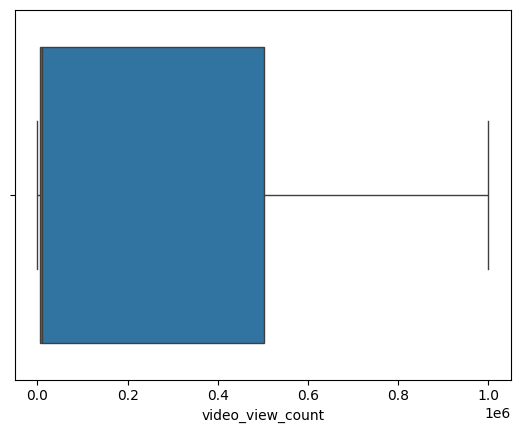

In [171]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
sns.boxplot(x=data_train['video_view_count'])
plt.show()

In [172]:
# prompt: perform describe to data_train

data_train.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,14319.000000,1.431900e+04,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000
mean,9515.146449,5.616996e+09,32.431664,254700.634751,84335.687129,16734.447936,1041.541448,349.406034
std,5507.651248,2.538643e+09,16.198635,322782.964103,133273.078759,31995.917059,1984.914285,799.860247
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4740.500000,3.414097e+09,18.000000,4931.000000,826.000000,116.000000,7.000000,1.000000
50%,9521.000000,5.620098e+09,32.000000,9981.000000,3397.000000,728.000000,46.000000,10.000000
75%,14277.500000,7.822865e+09,46.000000,502345.000000,124922.000000,18287.500000,1162.500000,291.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,654588.000000,249672.000000,14994.000000,9599.000000


In [173]:
# prompt: replace any values < 0 in column "video_view_count" with 0

# Replace values less than 0 in 'video_view_count' with 0
data_train['video_view_count'] = np.where(data_train['video_view_count'] < 0, 0, data_train['video_view_count'])

# Verify minimum value is now 0
data_train['video_view_count'].describe()


,video_view_count
count,14319.000000
mean,254700.634751
std,322782.964103
min,20.000000
25%,4931.000000
50%,9981.000000
75%,502345.000000
max,999817.000000


In [174]:
# Log transform the `video_view_count` column in the training data
data_train['video_view_count'] = np.log(data_train['video_view_count'] + 1)

# Display first few rows after handling outliers
data_train.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,6630,claim,5827297713,20,a colleague learned from the media a claim th...,not verified,active,13.495483,99642.0,19477.0,1844.0,70.0
1,12304,opinion,3604389227,53,my hypothesis is that baby octopuses are the s...,not verified,active,7.030857,389.0,145.0,5.0,2.0
2,1928,claim,3400704837,9,a friend learned in a discussion board that d...,not verified,active,12.917349,33937.0,12291.0,64.0,23.0
3,13071,opinion,9867115563,17,our position is that windshield wipers were in...,not verified,active,8.593413,174.0,11.0,3.0,0.0
4,5932,claim,3098472800,19,a colleague learned online that human eyeball...,not verified,active,10.300450,13557.0,4443.0,325.0,70.0


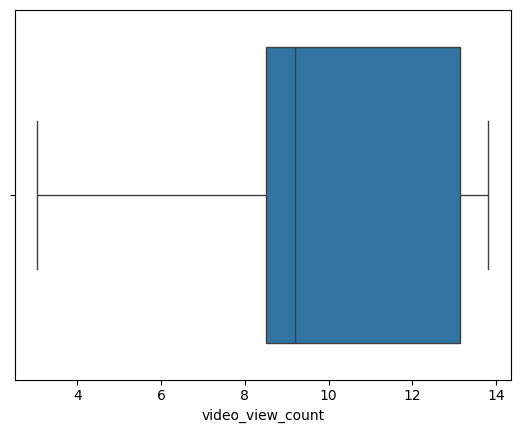

In [175]:
# prompt: plot a boxplot for column video_view_count

sns.boxplot(x=data_train['video_view_count'])
plt.show()


In [176]:
data_train.claim_status.unique()

array(['claim', 'opinion'], dtype=object)

In [177]:
# Create an instance of the OrdinalEncoder
encoder_train = OrdinalEncoder(
    categories=[['opinion', 'claim']],
    handle_unknown='use_encoded_value',
    unknown_value=-1)

In [178]:
display(encoder_train.get_params())

{'categories': [['opinion', 'claim']],
 'dtype': numpy.float64,
 'encoded_missing_value': nan,
 'handle_unknown': 'use_encoded_value',
 'max_categories': None,
 'min_frequency': None,
 'unknown_value': -1}

In [179]:
encoder_train.fit(data_train[['claim_status']])
display(encoder_train.get_params())

{'categories': [['opinion', 'claim']],
 'dtype': numpy.float64,
 'encoded_missing_value': nan,
 'handle_unknown': 'use_encoded_value',
 'max_categories': None,
 'min_frequency': None,
 'unknown_value': -1}

In [180]:
data_train['claim_status_encoded'] = encoder_train.transform(data_train[['claim_status']])
data_train.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim_status_encoded
0,6630,claim,5827297713,20,a colleague learned from the media a claim th...,not verified,active,13.495483,99642.0,19477.0,1844.0,70.0,1.0
1,12304,opinion,3604389227,53,my hypothesis is that baby octopuses are the s...,not verified,active,7.030857,389.0,145.0,5.0,2.0,0.0
2,1928,claim,3400704837,9,a friend learned in a discussion board that d...,not verified,active,12.917349,33937.0,12291.0,64.0,23.0,1.0
3,13071,opinion,9867115563,17,our position is that windshield wipers were in...,not verified,active,8.593413,174.0,11.0,3.0,0.0,0.0
4,5932,claim,3098472800,19,a colleague learned online that human eyeball...,not verified,active,10.300450,13557.0,4443.0,325.0,70.0,1.0


In [181]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14319 entries, 0 to 14318
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         14319 non-null  int64  
 1   claim_status              14319 non-null  object 
 2   video_id                  14319 non-null  int64  
 3   video_duration_sec        14319 non-null  int64  
 4   video_transcription_text  14319 non-null  object 
 5   verified_status           14319 non-null  object 
 6   author_ban_status         14319 non-null  object 
 7   video_view_count          14319 non-null  float64
 8   video_like_count          14319 non-null  float64
 9   video_share_count         14319 non-null  float64
 10  video_download_count      14319 non-null  float64
 11  video_comment_count       14319 non-null  float64
 12  claim_status_encoded      14319 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.4+ MB


### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [182]:
# Code a correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
corr = data_train.corr(numeric_only=True)
corr

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim_status_encoded
#,1.000000,-0.007426,0.005350,-0.796810,-0.539933,-0.452035,-0.447252,-0.376806,-0.865474
video_id,-0.007426,1.000000,0.014614,0.010453,0.001560,-0.002547,0.007275,0.004521,0.009202
video_duration_sec,0.005350,0.014614,1.000000,-0.000786,0.012694,0.008734,0.013082,0.000863,-0.000534
video_view_count,-0.796810,0.010453,-0.000786,1.000000,0.696688,0.576072,0.575882,0.481738,0.918796
video_like_count,-0.539933,0.001560,0.012694,0.696688,1.000000,0.825829,0.817785,0.688221,0.619068
video_share_count,-0.452035,-0.002547,0.008734,0.576072,0.825829,1.000000,0.672151,0.576512,0.511647
video_download_count,-0.447252,0.007275,0.013082,0.575882,0.817785,0.672151,1.000000,0.837378,0.513240
video_comment_count,-0.376806,0.004521,0.000863,0.481738,0.688221,0.576512,0.837378,1.000000,0.429618
claim_status_encoded,-0.865474,0.009202,-0.000534,0.918796,0.619068,0.511647,0.513240,0.429618,1.000000


Visualize a correlation heatmap of the data.

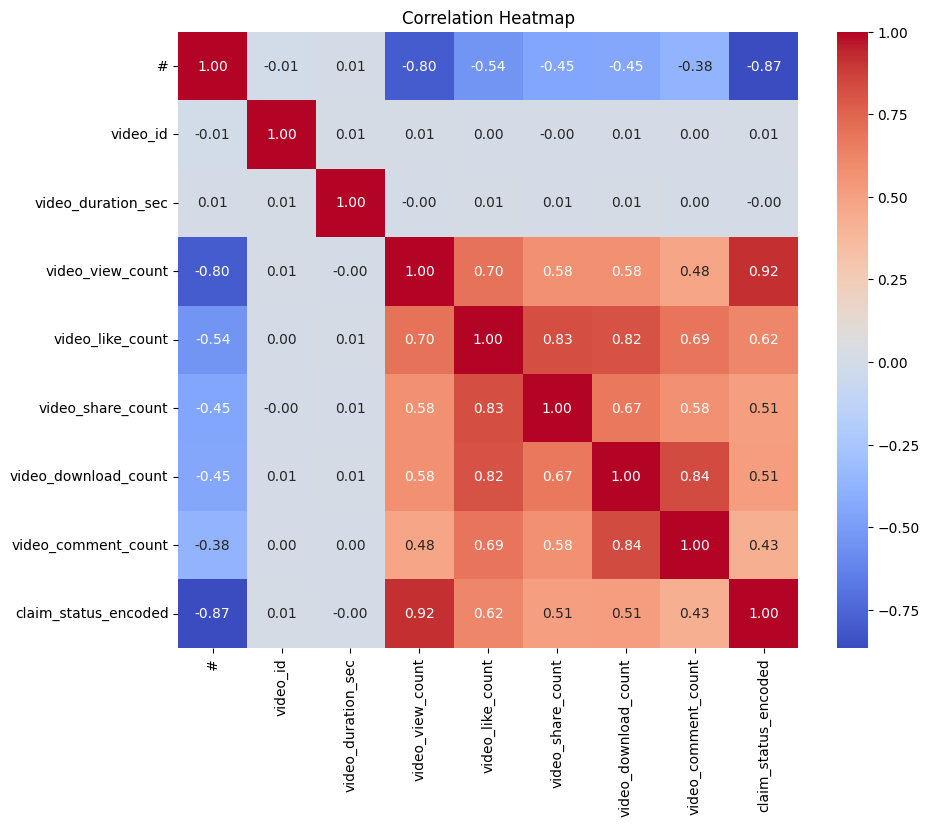

In [183]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?
* The following numeric variables appear to have fair amounts of correlation with each other:
    * video_view_count
    * video_like_count
    * video_share_count
    * video_download_count
    * video_comment_count

<img src="https://drive.google.com/uc?id=1xa68IrpTXu0KRFO49MEMiLaje8469nsk" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

### **Task 3b. Train-test split**

In [184]:
data_train.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim_status_encoded
0,6630,claim,5827297713,20,a colleague learned from the media a claim th...,not verified,active,13.495483,99642.0,19477.0,1844.0,70.0,1.0
1,12304,opinion,3604389227,53,my hypothesis is that baby octopuses are the s...,not verified,active,7.030857,389.0,145.0,5.0,2.0,0.0
2,1928,claim,3400704837,9,a friend learned in a discussion board that d...,not verified,active,12.917349,33937.0,12291.0,64.0,23.0,1.0
3,13071,opinion,9867115563,17,our position is that windshield wipers were in...,not verified,active,8.593413,174.0,11.0,3.0,0.0,0.0
4,5932,claim,3098472800,19,a colleague learned online that human eyeball...,not verified,active,10.300450,13557.0,4443.0,325.0,70.0,1.0


In [185]:
# prompt: create dataframe X_train with column "video_view_count" in data_train, and dataframe y_train with column "claim_status_encoded" in data_train

# Select outcome variable
y_train = data_train['claim_status_encoded']

# Select features
X_train = data_train[['video_view_count']]


Split the data into training and testing sets.

Confirm that the dimensions of the training and testing sets are in alignment.

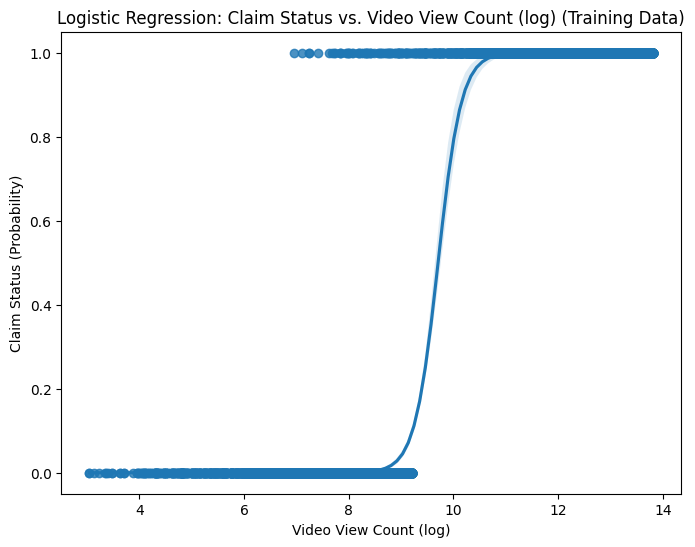

In [186]:
# Create regplot
plt.figure(figsize=(8, 6))
sns.regplot(x=X_train, y=y_train, data=data, logistic=True)
plt.title('Logistic Regression: Claim Status vs. Video View Count (log) (Training Data)')
plt.xlabel('Video View Count (log)')
plt.ylabel('Claim Status (Probability)')
plt.show()

### **Task 3c. Encode variables**

Check the data types of the features.

In [187]:
# Check data types
### YOUR CODE HERE ###
X_train.dtypes

,0
video_view_count,float64


Check the data type of the outcome variable.

In [188]:
# Check data type of outcome variable
### YOUR CODE HERE ###
y_train.dtypes

dtype('float64')

In [189]:
# prompt: find the unique values of y_train

y_train.unique()


array([1., 0.])

In [190]:
# EXTRA
y_train.head()

,claim_status_encoded
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


In [191]:
# EXTRA
y_train.tail()

,claim_status_encoded
14314,1.0
14315,0.0
14316,0.0
14317,0.0
14318,1.0


### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [192]:
# prompt: Construct a model and fit it to the training set

# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
#log_reg = LogisticRegression(random_state=0, max_iter=800)
#log_reg.fit(X_train_final, y_train_encoded)


In [193]:
# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
log_reg = LogisticRegression(random_state=0, max_iter=800)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=800, random_state=0)

In [194]:
y_train_pred = log_reg.predict(X_train)

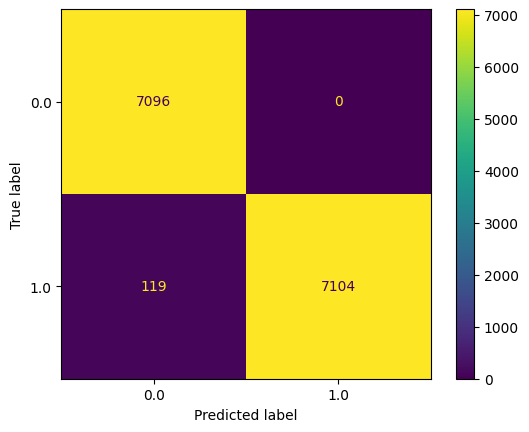

In [195]:
cm = confusion_matrix(y_train, y_train_pred, labels=log_reg.classes_)

# Create display of confusion matrix
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()

# Display plot
### YOUR CODE HERE ###
plt.show()

In [196]:
target_names = ['opinion', 'claim']
print(classification_report(y_train, y_train_pred, target_names=target_names))

              precision    recall  f1-score   support

     opinion       0.98      1.00      0.99      7096
       claim       1.00      0.98      0.99      7223

    accuracy                           0.99     14319
   macro avg       0.99      0.99      0.99     14319
weighted avg       0.99      0.99      0.99     14319



In [197]:
cm[0,0]/(cm[0,0] + cm[1,0])


0.9835065835065835

<img src="https://drive.google.com/uc?id=1O04Ts47cyQs_UPSPtJxUXGEKsSpteLRL" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [102]:
# prompt: show head of data_test

data_test.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
17817,17818,opinion,4380415685,44,my friends are willing to wager that there are...,not verified,active,2398.0,89.0,33.0,2.0,0.0
15775,15776,opinion,1868122816,31,my family's hypothesis is that 12 plants and 5...,verified,active,2346.0,514.0,67.0,4.0,1.0
15849,15850,opinion,4267546329,32,"my colleagues' point of view is that in japan,...",not verified,active,277.0,39.0,9.0,1.0,0.0
13544,13545,opinion,7840268701,14,my friends' view is that the rubik's cube is t...,not verified,active,8568.0,3704.0,702.0,46.0,0.0
6409,6410,claim,7461468794,59,a colleague learned on a website a claim that...,verified,active,837289.0,15160.0,4085.0,296.0,194.0


In [198]:
data_test['video_view_count'] = np.where(data_test['video_view_count'] < 0, 0, data_test['video_view_count'])
data_test['video_view_count'] = np.log(data_test['video_view_count'] + 1)

In [199]:
data_test['claim_status_encoded'] = encoder_train.transform(data_test[['claim_status']])
data_test.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim_status_encoded
17817,17818,opinion,4380415685,44,my friends are willing to wager that there are...,not verified,active,7.782807,89.0,33.0,2.0,0.0,0.0
15775,15776,opinion,1868122816,31,my family's hypothesis is that 12 plants and 5...,verified,active,7.760893,514.0,67.0,4.0,1.0,0.0
15849,15850,opinion,4267546329,32,"my colleagues' point of view is that in japan,...",not verified,active,5.627621,39.0,9.0,1.0,0.0,0.0
13544,13545,opinion,7840268701,14,my friends' view is that the rubik's cube is t...,not verified,active,9.055906,3704.0,702.0,46.0,0.0,0.0
6409,6410,claim,7461468794,59,a colleague learned on a website a claim that...,verified,active,13.637926,15160.0,4085.0,296.0,194.0,1.0


In [200]:
# prompt: display all rows that has a negative "claim_status_encoded"

data_test[data_test['claim_status_encoded'] < 0]


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim_status_encoded
19268,19269,NaN,9920556870,7,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN,-1.0
19154,19155,NaN,6034865966,8,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN,-1.0
19125,19126,NaN,9384938592,60,NaN,verified,active,NaN,NaN,NaN,NaN,NaN,-1.0
19343,19344,NaN,5840841576,11,NaN,verified,active,NaN,NaN,NaN,NaN,NaN,-1.0
19264,19265,NaN,3346725936,23,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19217,19218,NaN,9221153317,60,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN,-1.0
19271,19272,NaN,4919724171,48,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN,-1.0
19215,19216,NaN,6491822380,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN,-1.0
19202,19203,NaN,9271166454,35,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN,-1.0


In [201]:
# prompt: remove the rows that has a negative "claim_status_encoded"

data_test = data_test[data_test['claim_status_encoded'] >= 0]


In [202]:
data_test[data_test['claim_status_encoded'] < 0]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim_status_encoded


In [203]:
y_test_pred = log_reg.predict(data_test[['video_view_count']])

Create a confusion matrix to visualize the results of the logistic regression model.

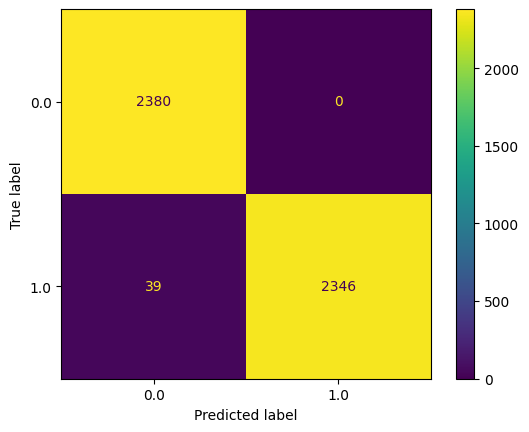

In [205]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(data_test[['claim_status_encoded']], y_test_pred, labels=log_reg.classes_)

# Create display of confusion matrix
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()

# Display plot
### YOUR CODE HERE ###
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [206]:
cm[1,1]/(cm[1,1] + cm[1,0])

0.9836477987421384

In [208]:
# Create a classification report
### YOUR CODE HERE ###
#{"verified": 1.0, "not verified": 0.0}
target_names = ['not verified', 'verified']
print(classification_report(data_test[['claim_status_encoded']], y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

not verified       0.98      1.00      0.99      2380
    verified       1.00      0.98      0.99      2385

    accuracy                           0.99      4765
   macro avg       0.99      0.99      0.99      4765
weighted avg       0.99      0.99      0.99      4765



### **Task 4c. Interpret model coefficients**

In [ ]:
# prompt: Get the feature names from the model and the model coefficients (which represent log-odds ratios). Place into a DataFrame for readability.

# Get the feature names from the model
#feature_names = X_train_final.columns

# Get the coefficients (log-odds ratios) from the model
#coefficients = log_reg.coef_.ravel()

# Create a DataFrame for readability
#coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
#coefficients_df


In [209]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
### YOUR CODE HERE ###
# Get the feature names from the model
feature_names = X_train.columns

# Get the coefficients (log-odds ratios) from the model
coefficients = log_reg.coef_.ravel()
display(coefficients)
display(log_reg.coef_)

# Create a DataFrame for readability
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df

array([4.35665789])

array([[4.35665789]])

,Feature,Coefficient
0,video_view_count,4.356658


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

==> ENTER YOUR RESPONSE TO QUESTIONS 1 AND 2 HERE

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.